# **7.4 Support Vector Machines**

Algoritmos muy utilizado de clasificación y regresión

In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<font size = 5> 

Las SVM parten de **datos etiquetados** intentar determinar un hiperplano que separe de manera óptima los grupos de datos. Esto lo logra intentando maximizar la distancia (llamada margen) del hiperplano a los datos más cercanos (a los que llama Support Vectors).

<center><img src="./imgs/svm.png" >

<font size = 5> 

Su aplicación en SKLEARN es trivial, usamos *'sklearn.svm.SVC()'*

**Este clasificador  requiere varios parámetros, de los que el más relevante es el *kernel.***

In [3]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.svm import SVC
svc = SVC(kernel= 'rbf', # kernel='rbf', 'linear', 'poly', 'sigmoid', 'precomputed'
    gamma='auto') # gamma='auto', 'scale'
svc.fit(X, y)

SVC(gamma='auto')

<font size = 5> 

Principalmente podemos decir que las ventajas y desventajas de las SVM son:
* **capacidad de hacer separaciones efectivas en entornos no lineales**, internamente esto se logra haciendo proyecciones a espacios de más dimensiones.

* Son muy resistentes al overfitting.

* Mediante una adaptación (SVR) pueden utilizarse también para regresión.

Por contra:

* Son bastante sensibles a los hiperparámetros seleccionados, especialmente al kernel.

* Son caros en términos computacionales, especialmente en datos de muchas dimensiones.

* Carecen de outputs probabilisticos, un dato siempre tendrá una etiqueta con total certeza.

<font size = 5> 

## EJEMPLO:

Creemos un dataset aleatorio de testeo y ajustemos un modelo para que lo prediga.

La visualización de los SVM es complicada debido a que normalmente estamos representando espacios multidimensionales (N características).

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

# Creamos un dataset de prueba:
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0)

# Las separamos en train y test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos el modelo:
modelo = svm.SVC(kernel='poly', degree=3, gamma='auto')
modelo = modelo.fit(X_train, y_train)

# Mostramos los resultados:
print(modelo.score(X_train, y_train))
print(modelo.score(X_test, y_test))

0.95125
0.96


<font size = 5> 

La visualización de los SVM es complicada debido a que normalmente estamos representando espacios multidimensionales (N características). Pero siempre podemos mostrar bidimensionalmente 2 caracteristicas y las etiquetas:

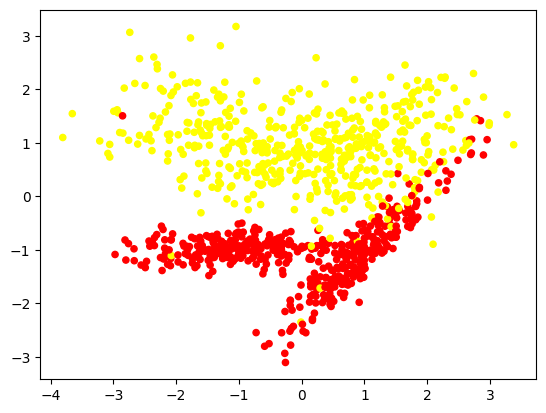

In [16]:
import matplotlib.pyplot as plt

# Ploteamos en función de la clase:
plt.scatter(X[:, 0], # Primera característica
            X[:, 1], # Segunda característica
            c=y, s=20, cmap='autumn');

<font size = 5> 

Con estas funciones podéis pintar zonas:

In [6]:
# Funciones para pintar las zonas de decisión:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


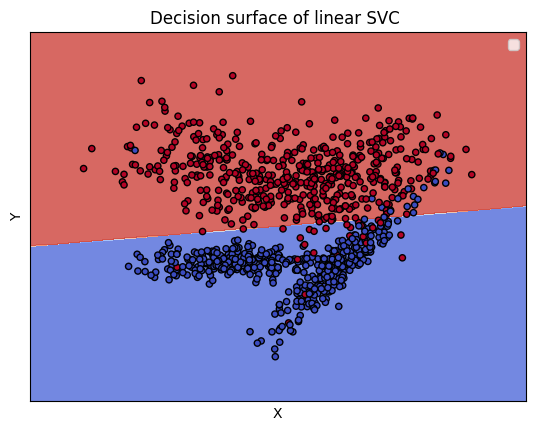

In [15]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, modelo, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()